Checking pt = 30 requirement; make plots for AN
* before - src/FireROOT/Analysis/python/outputs/rootfiles/modules/signalLjEfficiency__mXX-500_lxy-300.root
* after - src/FireROOT/Analysis/python/outputs/rootfiles/modules/signalLjEfficiency_modifiedElectronID__mXX-500_lxy-300.root

conda activate py2

pip install jupyter notebook

jupyter notebook --no-browser --port=9017 notebook_name.ipynb

Make sure to cmsenv first

In [1]:
from rootpy.io import root_open
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend
import ROOT

import os
from FireROOT.Analysis.Utils import *

Welcome to JupyROOT 6.12/07


In [5]:
CMSSW_BASE = os.getenv('CMSSW_BASE')
fn_5 = os.path.join(CMSSW_BASE, 'src/FireROOT/Analysis/python/outputs/rootfiles/modules/mxx100.root')
d_5 = root_open(fn_5).ch2mu2e.sig

fn_1p2 = os.path.join(CMSSW_BASE, 'src/FireROOT/Analysis/python/outputs/rootfiles/modules/mxx100_mA-1p2.root')
d_1p2 = root_open(fn_1p2).ch2mu2e.sig

In [4]:
set_style(MyStyle())
canvas = Canvas()

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


In [6]:
sample_names = [k.name for k in d_1p2.keys()]
sample_names.sort(key=lambda x: float(x.split('mA-')[1].split('_')[0].replace('p', '.')))

sample_names2 = [k.name for k in d_5.keys()]
sample_names2.sort(key=lambda x: float(x.split('mA-')[1].split('_')[0].replace('p', '.')))

In [7]:
def get_hists(d,d2):
    hists = []
    for s in sample_names2:
        sample_dir = getattr(d2, s)
        hist_ = getattr(sample_dir, 'ptDpToEl__total').clone()
        hists.append(hist_)
    for s in sample_names:
        sample_dir = getattr(d, s)
        hist_ = getattr(sample_dir, 'ptDpToEl__total').clone()
        hists.append(hist_)
    return hists

In [9]:
hists = get_hists(d_1p2, d_5)
print(hists)

[Hist('Hist_r8bCXE3T4Vf9AcZG2oA7i4'), Hist('Hist_Sr7j2x446KyXD2iCqatjje'), Hist('Hist_Umz5C2gdd8wvLauhjxC5dS'), Hist('Hist_xKGiw4LDnzWeUb3UZNuA7P'), Hist('Hist_sP9WGBgqJziy3xfhDoVqj3'), Hist('Hist_AAS5pxyLqkxxSeUDXpBxwc'), Hist('Hist_bd84xx2GWSGaRYLAV2J6kP'), Hist('Hist_s9EVvQrFpuTJoezA8gadeY'), Hist('Hist_gKrKaYxgQAM6rhqE3bDFhS'), Hist('Hist_s9YYmzCfS7oRQZLGXvyb8c')]


In [48]:
size2 = len(sample_names2)
print("Efficiency loss for pt > 30 GeV cut on dark photons")
last_bin = 8
#last_bin = 6 correspons to pt cut at 30 GeV

for j, h in enumerate(hists):
    if j< size2:
        name = sample_names2[j]
    else:
        name = sample_names[j-size2]

    eff = h.integral(0,last_bin)/h.integral()*100
    print(name, h.integral(0,last_bin),h.integral(),eff)
    #print(h.GetBinCenter(6))
    
    sum_ = 0
    for i in range(0,last_bin+1):
     #   print(i, h.GetBinContent(i))
        sum_ = sum_ + h.GetBinContent(i)
    #print(sum_,h.integral(0,6))

Efficiency loss for pt > 30 GeV cut on dark photons
('mXX-100_mA-5_lxy-3_ctau-4', 26035.0, 100762.0, 25.838113574561838)
('mXX-100_mA-5_lxy-300_ctau-400', 25695.0, 91239.0, 28.162299016867788)
('mXX-100_mA-5_lxy-30_ctau-40', 26008.0, 100294.0, 25.931760623766127)
('mXX-100_mA-5_lxy-150_ctau-200', 28347.0, 107259.0, 26.428551450227957)
('mXX-100_mA-5_lxy-0p3_ctau-0p4', 26184.0, 101379.0, 25.827834166839285)
('mXX-100_mA-1p2_lxy-30_ctau-9p6', 23988.0, 92622.0, 25.898814536503206)
('mXX-100_mA-1p2_lxy-300_ctau-96', 22002.0, 79665.0, 27.61815100734325)
('mXX-100_mA-1p2_lxy-3_ctau-0p96', 27407.0, 106762.0, 25.671118937449656)
('mXX-100_mA-1p2_lxy-150_ctau-48', 24806.0, 94201.0, 26.333053789237905)
('mXX-100_mA-1p2_lxy-0p3_ctau-0p096', 20515.0, 80351.0, 25.531729536657917)


In [ ]:
size2 = sample_names2.length

0
1
2
3
4
5
6
7
8
9


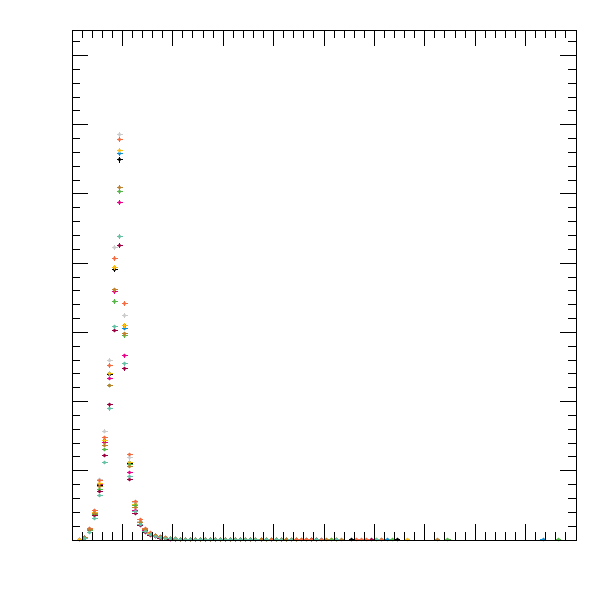

In [11]:
canvas.clear()

for i, g in enumerate(hists):
    print(i)
    g.markercolor = sigCOLORS[i]
    g.markersize = 0.3
    g.linecolor = sigCOLORS[i]
    g.legendstyle = 'LEP'
    if i==0: g.drawstyle = 'APZ'
    else:    g.drawstyle = 'PZ'
        
draw(hists[:], pad=canvas)
canvas.Draw()

0
1


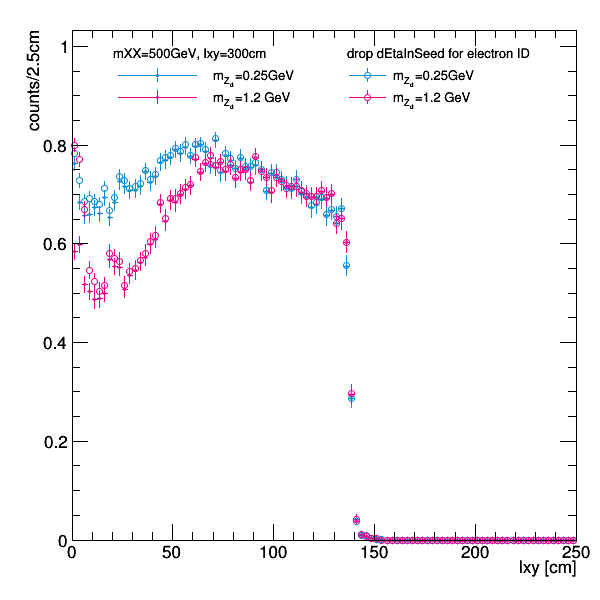

In [14]:
canvas.clear()

for i, g in enumerate(hists):
    print(i)
    g.markercolor = sigCOLORS[i]
    g.markersize = 0.3
    g.linecolor = sigCOLORS[i]
    g.legendstyle = 'LEP'
    if i==0: g.drawstyle = 'APZ'
    else:    g.drawstyle = 'PZ'
        
draw(hists[:], pad=canvas)
leg = Legend(len(efficiency_graphs_old), margin=0.25, leftmargin=0.05,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,
             header='mXX=500GeV, lxy=300cm')
leg.AddEntry(efficiency_graphs_old[0], 'm_{Z_{d}}=0.25GeV')
leg.AddEntry(efficiency_graphs_old[1], 'm_{Z_{d}}=1.2 GeV')
#leg.AddEntry(efficiency_graphs_old[2], 'm_{Z_{d}}=5   GeV')
leg.Draw()

leg2 = Legend(len(efficiency_graphs_new), margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,
             header='drop dEtaInSeed for electron ID')
leg2.AddEntry(efficiency_graphs_new[0], 'm_{Z_{d}}=0.25GeV', style='LEP')
leg2.AddEntry(efficiency_graphs_new[1], 'm_{Z_{d}}=1.2 GeV', style='LEP')
#leg2.AddEntry(efficiency_graphs_new[2], 'm_{Z_{d}}=5   GeV', style='LEP')
leg2.Draw()

canvas.Draw()

In [8]:
def get_efficiencies(d, d2):
    efficiencies = []
    for s in sample_names2:
        sample_dir = getattr(d2, s)
        numer_ = getattr(sample_dir, 'lxyDpToEl__match').clone()
        denom_ = getattr(sample_dir, 'lxyDpToEl__total').clone()
        e = Efficiency(numer_, denom_)
        efficiencies.append(e)
    for s in sample_names:
        sample_dir = getattr(d, s)
        numer_ = getattr(sample_dir, 'lxyDpToEl__match').clone()
        denom_ = getattr(sample_dir, 'lxyDpToEl__total').clone()
        e = Efficiency(numer_, denom_)
        efficiencies.append(e)
    return efficiencies

In [9]:
efficiency_old = get_efficiencies(oldd1p2, oldd0p25)
efficiency_new = get_efficiencies(newd1p2, newd0p25)

In [10]:
import pandas as pd

In [11]:
for e_old, e_new in zip(efficiency_old, efficiency_new):
    data = {'old':{}, 'new':{}}
    data['old']['efficiency'] = '%.2f%%' % ( e_old.overall_efficiency()[0]*100 )
    data['old']['total'] = int(e_old.total.integral())
    data['old']['passed'] = int(e_old.passed.integral())
    
    data['new']['efficiency'] = '%.2f%%' % (e_new.overall_efficiency()[0]*100)
    data['new']['total'] = int(e_new.total.integral())
    data['new']['passed'] = int(e_new.passed.integral())
    
    df = pd.DataFrame(data).T
    print df
    
#     print 'total efficiency: %.2f%%, %.2f%%' % (e_old.overall_efficiency()[0]*100, e_new.overall_efficiency()[0]*100)
#     print 'total: ', e_old.total.integral(), e_new.total.integral()
#     print 'passed: ', e_old.passed.integral(), e_new.passed.integral()

    efficiency passed  total
new     48.74%  33567  68871
old     48.26%  33240  68871
    efficiency passed  total
new     44.35%  28698  64713
old     43.15%  27921  64713


In [12]:
e_new.overall_efficiency()[0]*100

44.34657642204812

In [15]:
def get_efficiency_graphs_mu(d, d2):
    efficiency_graphs = []
    for s in sample_names2:
        sample_dir = getattr(d2, s)
        numer_ = getattr(sample_dir, 'lxyDpToMu__match').clone()
        denom_ = getattr(sample_dir, 'lxyDpToMu__total').clone()
        g = Efficiency(numer_, denom_).graph
        efficiency_graphs.append(g)
    for s in sample_names:
        sample_dir = getattr(d, s)
        numer_ = getattr(sample_dir, 'lxyDpToMu__match').clone()
        denom_ = getattr(sample_dir, 'lxyDpToMu__total').clone()
        g = Efficiency(numer_, denom_).graph
        efficiency_graphs.append(g) 
    return efficiency_graphs

In [16]:
efficiency_graphs_old_mu = get_efficiency_graphs(oldd1p2, oldd0p25)

0
1


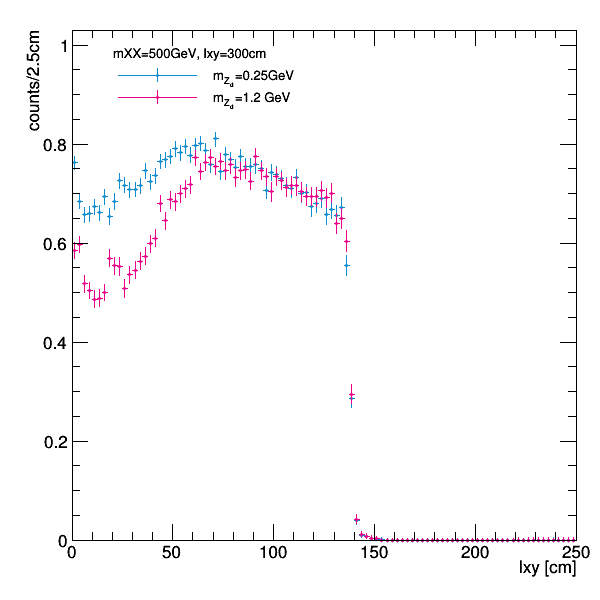

In [17]:
canvas.clear()

for i, g in enumerate(efficiency_graphs_old_mu):
    print(i)
    g.markercolor = sigCOLORS[i]
    g.markersize = 0.3
    g.linecolor = sigCOLORS[i]
    g.legendstyle = 'LEP'
    if i==0: g.drawstyle = 'APZ'
    else:    g.drawstyle = 'PZ'

        
                
draw(efficiency_graphs_old_mu[:], pad=canvas)
leg = Legend(len(efficiency_graphs_old_mu), margin=0.25, leftmargin=0.05,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,
             header='mXX=500GeV, lxy=300cm')
leg.AddEntry(efficiency_graphs_old_mu[0], 'm_{Z_{d}}=0.25GeV')
leg.AddEntry(efficiency_graphs_old_mu[1], 'm_{Z_{d}}=1.2 GeV')
#leg.AddEntry(efficiency_graphs_old[2], 'm_{Z_{d}}=5   GeV')
leg.Draw()

canvas.Draw()